In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
# print(df.shape)
# df.head()

In [3]:
# df.describe().transpose()

In [4]:
# df.info()

In [5]:
# columns = df.columns.tolist()
# [columns.remove(x) for x in ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
# columns

In [6]:
# for col in columns:
#     print(df[col].value_counts())

In [7]:
# df.isnull().sum()

In [8]:
columns = df.columns.tolist()
[columns.remove(x) for x in ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Status']]
# for col in columns:
    # temp = pd.crosstab(df[col], df['Loan_Status'])
    # temp.plot(kind='bar', color=['red','blue'], stacked=True, grid=True)
# plt.show()

[None, None, None, None, None]

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [10]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder, normalize
string_type_columns = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in string_type_columns:
    df[i] = le.fit_transform(df[i])
# df.dtypes

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [13]:
X = df.drop(labels=['Loan_Status','Loan_ID'],axis=1) # 'Gender','Married','Education','Dependents','Self_Employed','Loan_Amount_Term','Property_Area'
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [14]:
y = df['Loan_Status']
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [15]:
model = RandomForestClassifier()
model.fit(X, y)

C:\Users\yaser.sakkaf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# imp_features = pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh')
# plt.show()

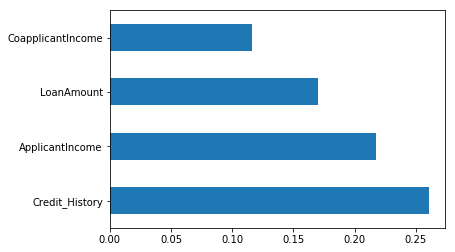

In [17]:
imp_features = pd.Series(model.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh')
plt.show()

In [18]:
# normalized_X = normalize(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)

clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
clf.score(X_train, y_train)

0.80217391304347829

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [24]:
cnf_matrix

array([[ 20,  23],
       [  2, 109]], dtype=int64)

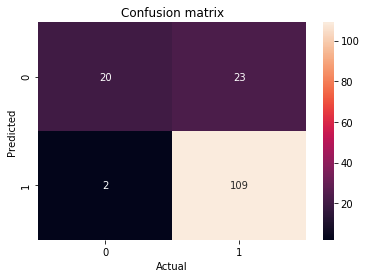

In [25]:
import numpy as np
import seaborn as sns

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.837662337662
Precision: 0.825757575758
Recall: 0.981981981982


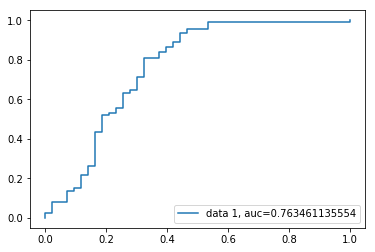

In [27]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=0)
plt.show()

In [94]:
model = RandomForestClassifier(max_depth=3,)
model.fit(X_train, y_train)

C:\Users\yaser.sakkaf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
model.score(X_train,y_train)

0.80869565217391304

In [96]:
y_pred = model.predict(X_test)

In [97]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [98]:
cnf_matrix

array([[ 17,  26],
       [  2, 109]], dtype=int64)

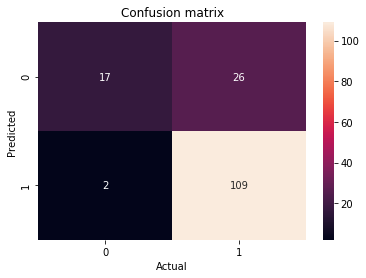

In [99]:
import numpy as np
import seaborn as sns

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.818181818182
Precision: 0.807407407407
Recall: 0.981981981982


In [24]:
test = pd.read_csv('test.csv')

In [25]:
Loan_ID = test['Loan_ID']
test = test.drop(labels='Loan_ID',axis=1)

In [26]:
print(test.shape)
test.isnull().sum()

(367, 11)


Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)
test['Self_Employed'].fillna('No',inplace=True)

print(test.shape)
test.isnull().sum()

(367, 11)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [28]:
string_type_columns_test = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area']
le = LabelEncoder()
for i in string_type_columns_test:
    test[i] = le.fit_transform(test[i])

y_pred=clf.predict(test)

In [29]:
Results = y_pred.tolist()
Results = map(str, Results)
resultcsv = pd.DataFrame(index=None)
resultcsv['Loan_ID'] = Loan_ID
resultcsv['Loan_Status'] = Results

In [30]:
resultcsv.dtypes

Loan_ID        object
Loan_Status    object
dtype: object

In [31]:
resultcsv.to_csv('result_data_boosting.csv', index=None)